# Importing Libraries


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
df=pd.read_csv("/kaggle/input/usa-data/USA_Housing (1).csv")

In [3]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


# Data Cleaning

In [4]:
df=df.drop('Address',axis=1)

In [5]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [6]:
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
dtype: object

In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
corr=df.corr()

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the process of analyzing and visualizing datasets to summarize their main characteristics, often using statistical graphics, plots, and other data visualization techniques. It helps to identify patterns, spot anomalies, test assumptions, and check the quality of data before applying more complex modeling techniques.


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


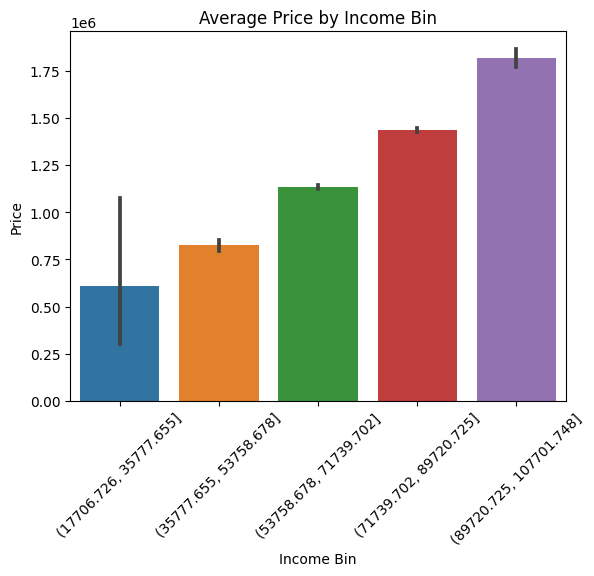

In [9]:
df['Income Bin'] = pd.cut(df['Avg. Area Income'], bins=5)
sns.barplot(x='Income Bin', y='Price', data=df)
plt.title('Average Price by Income Bin')
plt.xticks(rotation=45)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


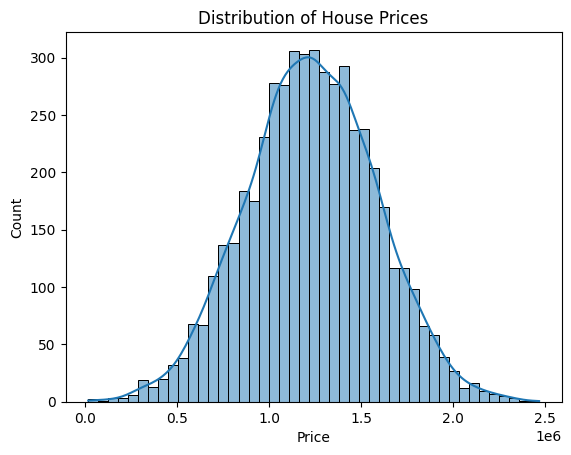

In [10]:
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


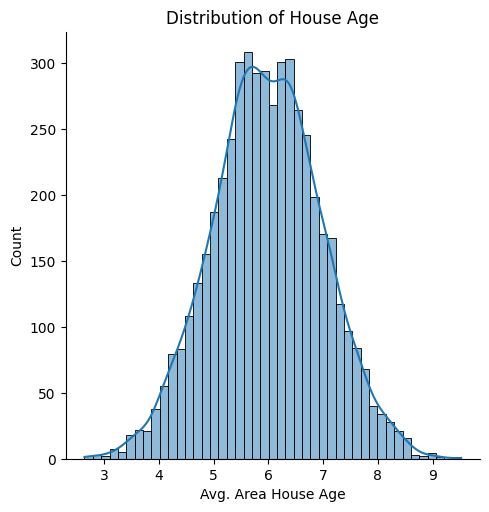

In [11]:
sns.displot(df['Avg. Area House Age'], kde=True)
plt.title('Distribution of House Age')
plt.show()


/tmp/ipykernel_17/1165091888.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Price'], shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


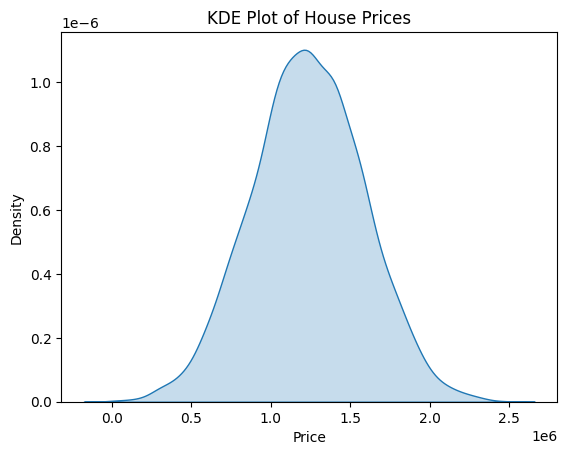

In [12]:
sns.kdeplot(df['Price'], shade=True)
plt.title('KDE Plot of House Prices')
plt.show()

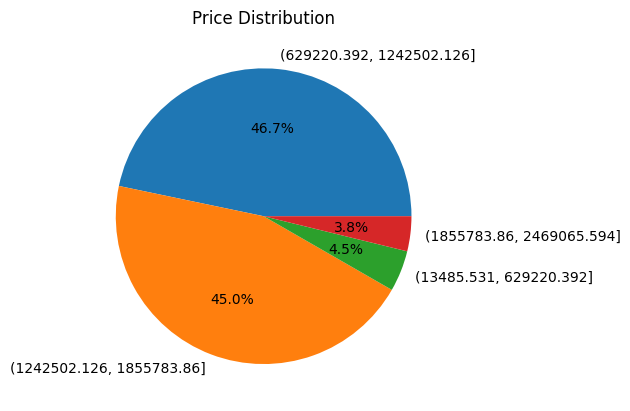

In [13]:
price_bins = pd.cut(df['Price'], bins=4)
price_distribution = price_bins.value_counts()
price_distribution.plot.pie(autopct='%1.1f%%')
plt.title('Price Distribution')
plt.ylabel('')
plt.show()

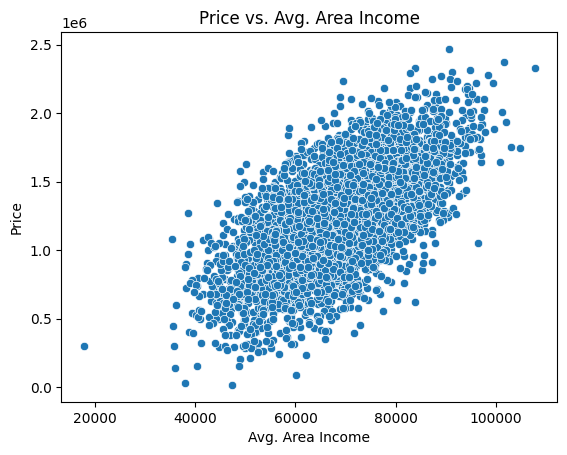

In [14]:
sns.scatterplot(x='Avg. Area Income', y='Price', data=df)
plt.title('Price vs. Avg. Area Income')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

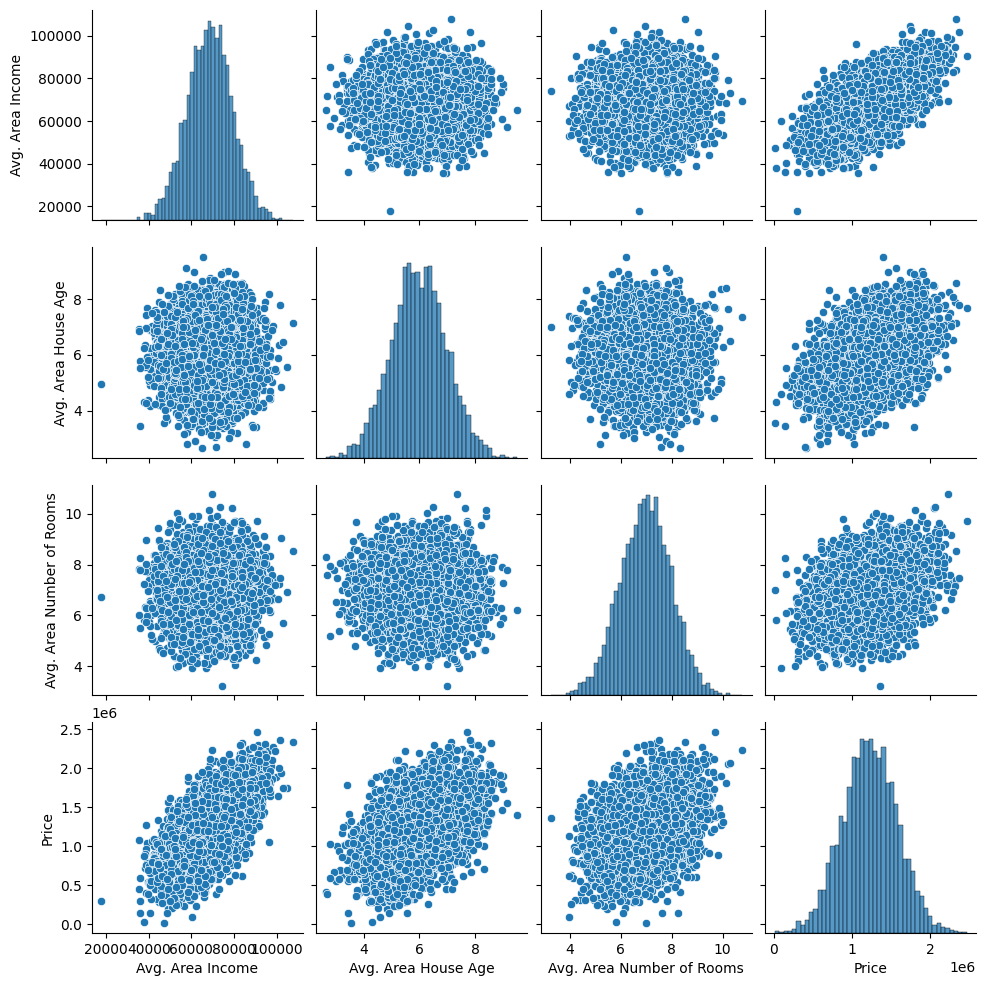

In [15]:
sns.pairplot(df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Price']])
plt.show()


# Exploratory Data Analysis(EDA) - Correlation Analysis

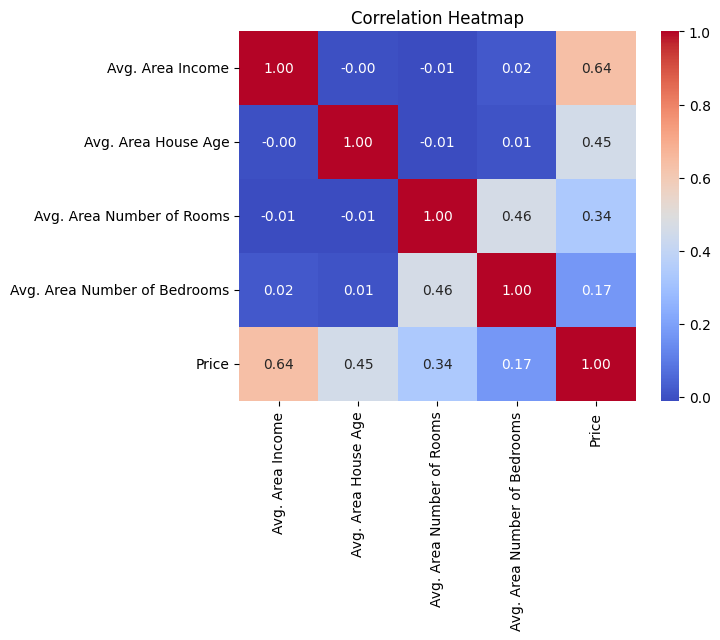

In [16]:
corr_matrix = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
#when we are near 0 correlation is there research should be focused on that and whereas number which are 0 or -1 are less important

/tmp/ipykernel_17/2488360811.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_grouped = df.groupby('Price Bin')[['Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Avg. Area House Age', 'Avg. Area Income']].mean()


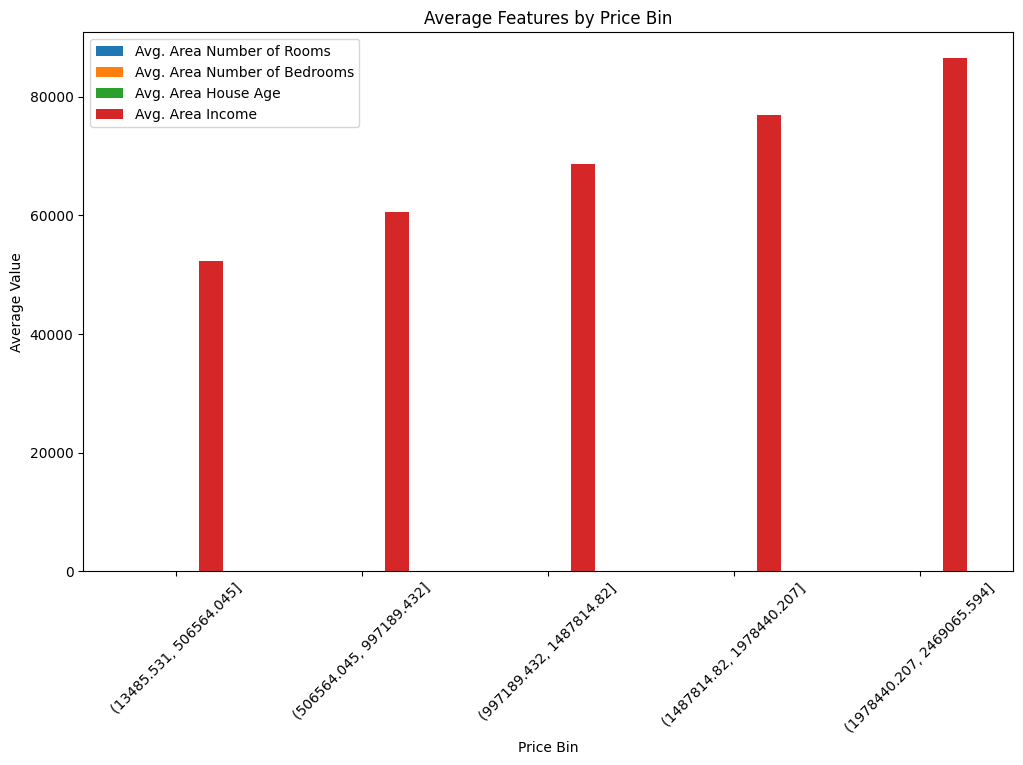

In [17]:
df['Price Bin'] = pd.cut(df['Price'], bins=5)
price_grouped = df.groupby('Price Bin')[['Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Avg. Area House Age', 'Avg. Area Income']].mean()

price_grouped.plot(kind='bar', figsize=(12, 7))
plt.title('Average Features by Price Bin')
plt.xlabel('Price Bin')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()



In [18]:
X=df.drop(['Price','Income Bin','Price Bin'],axis=1) # to drop row axis=0 and to drop column axis=1

In [19]:
y=df['Price']

# Train Test Split

Use train_test_split to split your data into a training set and a testing set.


In [20]:
from sklearn.model_selection import train_test_split # for train we jumble and then it pratices prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99) # for jumbling use random state=99 and 1/3 of test and 2/3 for train 

# Importing Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

# Declaring the Variable for Linear Regression




Linear Regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. It predicts the value of the dependent variable based on the values of the independent variables, minimizing the sum of squared differences between observed and predicted values.

In [22]:
lr=LinearRegression()

# Fitting the Model to X and Y

In [23]:
lr.fit(X_train,y_train)

LinearRegression()

# Getting the Intercept (C Value) of the Linear Regression Model

Below line of code retrieves the intercept (also known as the constant term c) of the fitted linear regression model, which represents the value of the dependent variable when all independent variables are zero.






In [24]:
lr.intercept_  #c value

-2646966.4613343445

In [25]:
y_pred=lr.predict(X_test)

# Visualizing the Error Distribution (Actual vs Predicted)

Below code visualizes the distribution of the errors (difference between actual values y_test and predicted values y_pred), helping to assess the model's performance by showing the spread of residuals or errors.

/tmp/ipykernel_17/3866075750.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)  #it subtracts prediction and actual value which gives error percentage
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

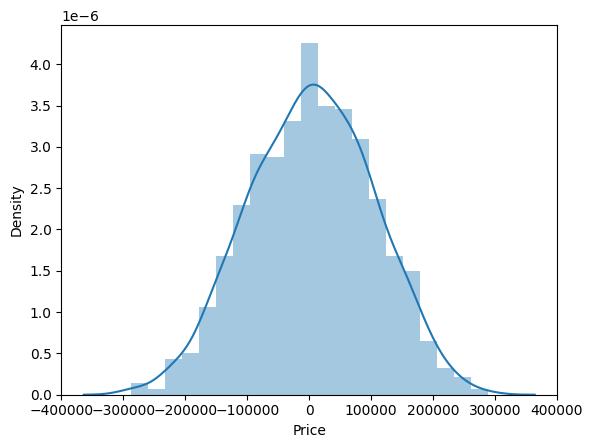

In [26]:
sns.distplot(y_test-y_pred)  #it subtracts prediction and actual value which gives error percentage

# Calculating the Root Mean Squared Error (RMSE) for Test and Training Data

Below code calculates the Root Mean Squared Error (RMSE) for both the test data (y_test) and training data (y_train), providing a measure of how well the linear regression model performs on both datasets. The lower the RMSE, the better the model.

In [27]:
from sklearn.metrics import mean_squared_error
import numpy as np
np.sqrt(mean_squared_error(y_test,y_pred))
y_train_pred=lr.predict(X_train)
np.sqrt(mean_squared_error(y_train,y_train_pred))

101275.71409538979

In [28]:
y_test[2:3]

2578    1.093873e+06
Name: Price, dtype: float64

In [29]:
#Prediction of 2578th row where test-train
1068019.39935159-1168355.3197896334

-100335.92043804331